In [52]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [53]:
fmnist = keras.datasets.fashion_mnist

In [54]:
(X_train, y_train) , (X_test, y_test) = fmnist.load_data()

In [57]:
X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]
y_train = to_categorical(y_train,10)

In [55]:
y_train.shape

(60000,)

In [56]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

[9 0 0]


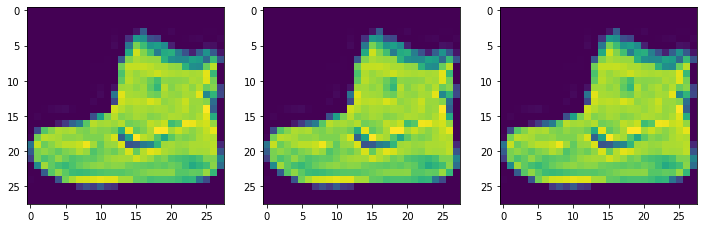

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(X_train[0])
plt.subplot(1,3,2)
plt.imshow(X_train[0])
plt.subplot(1,3,3)
plt.imshow(X_train[0])

print(y_train[0:3])

In [47]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
X_test.shape

(10000, 28, 28, 1, 1)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

# model = Sequential()
# model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="Same",activation="relu",input_shape=(28,28,1)))
# model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="Same",activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(units=32, activation="relu"))
# model.add(Dropout(0.25))
# model.add(Dense(units=10,activation="softmax"))

In [58]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=10,activation="softmax"))

In [59]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 288)              

In [60]:
model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=2)

Epoch 1/5
600/600 - 45s - loss: 0.7525 - accuracy: 0.7445
Epoch 2/5
600/600 - 54s - loss: 0.3967 - accuracy: 0.8566
Epoch 3/5


KeyboardInterrupt: 

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)

In [ ]:
y_test= to_categorical(y_test,10)